<a href="https://colab.research.google.com/github/DavidSoares98/Projeto_UFF/blob/main/OFICIAL_PROJETO_TEC_UFF_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Universidade Federal Fluminense - Campus Petrópolis

Orientador: Fábio Ribeiro Cerqueira

Alunos: David B. Soares e Lucas C. de Andrade

Base de dados retirada do [Kaggle](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)

# **Motivações e objetivo**
Segundo a Organização Pan Americana de Saúde ([OPAS](https://www.paho.org/pt/topicos/doencas-cardiovasculares#:~:text=As%20doen%C3%A7as%20cardiovasculares%20s%C3%A3o%20a,as%20mortes%20em%20n%C3%ADvel%20global.)), as doenças cardiovasculares são a causa número 1 de mortes em todo o mundo, é estimado que [17,9 milhões de pessoas morreram por doenças cardiovasculares em 2016](https://https://www.paho.org/pt/topicos/doencas-cardiovasculares#:~:text=As%20doen%C3%A7as%20cardiovasculares%20s%C3%A3o%20a,as%20mortes%20em%20n%C3%ADvel%20global.), sendo 31% de todas as mortes em nível global. Pessoas que possuem doenças cardiovasculares ou um alto risco cardiovascular, necessitam de detecção e tratamento precoces, para que se possa diminuir os riscos. O principal objetivo é desenvolver um algoritmo, que baseado nas colunas atributos, possa prever a doença cardiovascular.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
base_heart = pd.read_csv('/content/heart.csv')
base_heart.head()

# **Colunas**


---



**Age**: idade do paciente [anos]

---


**Sex**: sexo do paciente [M: Masculino, F: Feminino]

---


**ChestPainType**: ChestPainType: tipo de dor no peito [TA: Angina Típica, ATA: Angina Atípica, NAP: Dor Não Anginosa, ASY: Assintomática]

*Angina está relacionado a infarto*

*Não anginosa, não está*

---


**RestingBP**: pressão arterial de repouso [mm Hg]


---


**Cholesterol**: colesterol sérico [mm/dl]


---


**FastingBS**: glicemia em jejum [1: se FastingBS > 120 mg/dl, 0: caso contrário]


---


**RestingECG**:  resultados do eletrocardiograma de repouso [Normal: normal, ST: com anormalidade da onda ST-T (inversões da onda T e/ou elevação ou depressão do ST > 0,05 mV), HVE: Hipertrofia Ventricular Esquerda; mostrando provável ou definitiva hipertrofia ventricular]


---


**MaxHR**: frequência cardíaca máxima alcançada [Valor numérico entre 60 e 202]


---


**ExerciseAngina**: angina induzida por exercício [Y: Sim, N: Não]


---


**Oldpeak**: oldpeak = ST [Valor numérico medido em depressão]


---


**ST_Slope**: a inclinação do segmento ST do exercício de pico [Up: Para cima, Flat: Plano, Down: Para baixo]


---


**HeartDisease**: classe de saída [1: doença cardíaca, 0: normal]


---


*Angina = dor no peito*

São **14 colunas**, sendo a coluna ***HeartDisease*** a  coluna **classe**

#Análise Inical

In [ ]:
base_heart.describe(include = 'all')

Tratar Cholesterol e RestingBP, adotar média no lugar dos zeros (0).

In [ ]:
base_heart.shape

In [ ]:
base_heart.info()

In [ ]:
# Ver se existem valores nulos de forma gráfica
plt.figure(figsize=(10,5))
plt.title("Valores Nulos", fontsize=20)
sns.heatmap(base_heart.isnull(),cbar=False)
plt.xticks(rotation=45,ha='right');

**RestingBP e	Cholesterol** deverão ter dados tratados, uma vez que apresentam valores zerados, o que não faz sentido. A média será adotada.

In [ ]:
np.unique(base_heart['Sex'], return_counts='sex') 

In [ ]:
# Ver a procentagem de F e M
base_heart.Sex.value_counts(normalize=True)*100

In [ ]:
np.unique(base_heart['ChestPainType'], return_counts='ChestPainType')

In [ ]:
sns.histplot(x='ChestPainType',data=base_heart);

In [ ]:
np.unique(base_heart['RestingECG'], return_counts='RestingECG')

In [ ]:
sns.histplot(x='RestingECG',data=base_heart);

In [ ]:
np.unique(base_heart['ExerciseAngina'], return_counts='ExerciseAngina')

In [ ]:
sns.histplot(x='ExerciseAngina',data=base_heart);

In [ ]:
np.unique(base_heart['ST_Slope'], return_counts='ST_Slope')

In [ ]:
sns.histplot(x='ST_Slope',data=base_heart);

In [ ]:
# Ver a procentagem de 0 e 1
base_heart.HeartDisease.value_counts(normalize=True)*100

In [ ]:
#A coluna colesterol apresentam uma quantidade grande de valores 0. Aparentemente apresenta uma distribuição normal
sns.histplot(x='Cholesterol',data=base_heart,bins=20,kde=True);

In [ ]:
# Aparentemente colesterol não tem relação com problemas cardiacos. David depois faz isso na biblioteca plotly.express que fica mais legal
dados=base_heart[base_heart['Cholesterol']>0]
sns.boxplot(data=dados,x="Sex",y='Cholesterol', hue="HeartDisease");

Foi verificado que todos os dados dessas colunas foram preenchidos com valores esperados.

In [ ]:
fig = px.scatter(base_heart, x=base_heart.Age, y=base_heart.Cholesterol, color=base_heart.HeartDisease, size=base_heart.RestingBP)
fig.show()

In [ ]:
media = np.mean(base_heart[base_heart["Cholesterol"]>0].Cholesterol)
print(media)

In [ ]:
base_heart.loc[base_heart.Cholesterol<=0, "Cholesterol"]=media

In [ ]:
fig = px.scatter(base_heart, x=base_heart.Age, y=base_heart.Cholesterol, color=base_heart.HeartDisease, size=base_heart.RestingBP)
fig.show()

In [ ]:
media = np.mean(base_heart[base_heart["RestingBP"]>0].RestingBP)
print(media)
base_heart.loc[base_heart.RestingBP<=0, "RestingBP"]=media

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(base_heart.corr(), annot=True, cbar=False);

In [ ]:
fig = px.scatter(base_heart, y=base_heart.RestingBP, x=base_heart.Age, color=base_heart.HeartDisease)
fig.show()

In [ ]:
sns.countplot(x='ChestPainType', hue = "HeartDisease", data=base_heart);
#Dor atípica parece ter uma forte relevância

In [ ]:
sns.countplot(x='RestingECG', hue = "HeartDisease", data=base_heart);
#Não parece ajudar muito para prever a doença

In [ ]:
sns.countplot(x='ST_Slope', hue = "HeartDisease", data=base_heart);
#Aparenta ter uma forte relevância

In [ ]:
sns.histplot(x='Age',data=base_heart,bins=20,kde=True, hue = "HeartDisease");
#Doença manifestando em maior quantidade na população mais velha.

In [ ]:
px.treemap(base_heart, path=['ChestPainType', 'HeartDisease'])

In [ ]:
px.treemap(base_heart, path=['ST_Slope', 'HeartDisease'])

In [ ]:
px.scatter_matrix(base_heart, dimensions=['Age','MaxHR'], color='HeartDisease')

Tratamento para poder aplicar Naive Bayes

In [ ]:
base_heart.columns

In [ ]:
X = base_heart.iloc[:, 0:11].values
X

In [ ]:
y = base_heart.iloc[:, 11].values
y

In [ ]:
X_onehot = X.copy()
X_onehot

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
onehot_census = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), 
[1, 2, 6, 8, 10])], remainder='passthrough', sparse_threshold=0)

X_onehot = onehot_census.fit_transform(X_onehot)
X_onehot.shape

In [ ]:
X_onehot[0]

In [ ]:
len(X_onehot[0])

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

In [ ]:
dicretizer = ColumnTransformer(transformers=[('KBinsDiscretizer', KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform'), 
                                              [19, 18, 17, 16, 15, 14])], remainder='passthrough', sparse_threshold=0)

In [ ]:
X_onehot = dicretizer.fit_transform(X_onehot)

#Separar Teste e Treino

In [ ]:
from sklearn.model_selection import train_test_split

X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X_onehot, y, test_size=0.2, random_state=0)

X_treinamento.shape, y_treinamento.shape, X_teste.shape, y_teste.shape

In [ ]:
X_treinamento

#Normalizar

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X_onehot.shape

In [ ]:
X_treinamento_norm= StandardScaler().fit_transform(X_treinamento)

In [ ]:
X_teste_norm = StandardScaler().fit_transform(X_teste)

#Modelos

##Naive Bayes

In [ ]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
metodo_CNB = CategoricalNB()
metodo_CNB.fit(X_treinamento, y_treinamento )

In [ ]:
predicoes = metodo_CNB.predict(X_teste)

In [ ]:
matriz = confusion_matrix(y_teste, predicoes)
matriz

In [ ]:
nomes = np.unique(predicoes)
plt.figure(figsize=(12,8))
sns.heatmap(matriz, square=True, annot=True, fmt='d', cbar=False,
xticklabels=nomes, yticklabels=nomes)
plt.xlabel('Predito');
plt.ylabel('Verdadeiro');

In [ ]:
print(classification_report(y_teste, predicoes))

##XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
modelo_xgboost = XGBClassifier(random_state=10)
modelo_xgboost.fit(X_treinamento_norm, y_treinamento)

In [ ]:
predicoes_xgboost = modelo_xgboost.predict(X_teste_norm)

In [ ]:
matriz = confusion_matrix(y_teste, predicoes_xgboost)
matriz

In [ ]:
nomes = np.unique(predicoes_xgboost)
plt.figure(figsize=(12,8))
sns.heatmap(matriz, square=True, annot=True, fmt='d', cbar=False,
xticklabels=nomes, yticklabels=nomes)
plt.xlabel('Predito');
plt.ylabel('Verdadeiro');

In [ ]:
print(classification_report(y_teste, predicoes_xgboost ))

##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
modelo_random_forest = RandomForestClassifier(random_state=10)
modelo_random_forest.fit(X_treinamento_norm, y_treinamento)

In [ ]:
predicoes_random_forest = modelo_random_forest.predict(X_teste_norm)

In [ ]:
matriz_random_forest = confusion_matrix(y_teste, predicoes_random_forest)
matriz_random_forest 

In [ ]:
nomes = np.unique(predicoes_random_forest)
plt.figure(figsize=(12,8))
sns.heatmap(matriz_random_forest , square=True, annot=True, fmt='d', cbar=False,
xticklabels=nomes, yticklabels=nomes)
plt.xlabel('Predito');
plt.ylabel('Verdadeiro');

In [ ]:
print(classification_report(y_teste,predicoes_random_forest ))

##Árvore de Decissão

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
arvore_std = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_std.fit(X_treinamento_norm, y_treinamento)

In [ ]:
base_heart.columns[0:11]

In [ ]:
arvore_std.feature_importances_

In [ ]:
predicoes_arv = arvore_std.predict(X_teste_norm)

In [ ]:
matriz_arv = confusion_matrix(y_teste, predicoes_arv)
matriz_arv 

In [ ]:
nomes = np.unique(predicoes_arv)
plt.figure(figsize=(12,8))
sns.heatmap(matriz_arv , square=True, annot=True, fmt='d', cbar=False,
xticklabels=nomes, yticklabels=nomes)
plt.xlabel('Predito');
plt.ylabel('Verdadeiro');

In [ ]:
print(classification_report(y_teste,predicoes_arv ))

##KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_treinamento_norm, y_treinamento)

In [ ]:
predicoes_knn = knn.predict(X_teste_norm)

In [ ]:
matriz_knn = confusion_matrix(y_teste, predicoes_knn)
matriz_knn

In [ ]:
nomes = np.unique(predicoes_knn)
plt.figure(figsize=(12,8))
sns.heatmap(matriz_knn , square=True, annot=True, fmt='d', cbar=False,
xticklabels=nomes, yticklabels=nomes)
plt.xlabel('Predito');
plt.ylabel('Verdadeiro');

In [ ]:
print(classification_report(y_teste,predicoes_knn))

##MLP

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlp = MLPClassifier(max_iter= 5000000, random_state=10)
mlp.fit(X_treinamento_norm, y_treinamento)

MLPClassifier(max_iter=5000000, random_state=10)

In [ ]:
predicoes_mlp = mlp.predict(X_teste_norm)

In [ ]:
matriz_mlp = confusion_matrix(y_teste, predicoes_mlp)
matriz_mlp

array([[60, 17],
       [21, 86]])

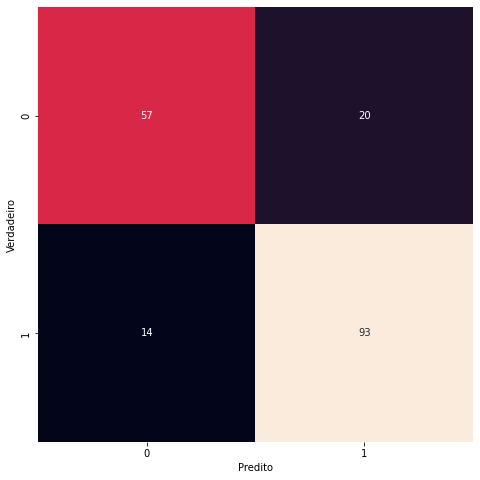

In [ ]:
nomes = np.unique(predicoes_mlp)
plt.figure(figsize=(12,8))
sns.heatmap(matriz_knn , square=True, annot=True, fmt='d', cbar=False,
xticklabels=nomes, yticklabels=nomes)
plt.xlabel('Predito');
plt.ylabel('Verdadeiro');

In [ ]:
print(classification_report(y_teste,predicoes_mlp))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76        77
           1       0.83      0.80      0.82       107

    accuracy                           0.79       184
   macro avg       0.79      0.79      0.79       184
weighted avg       0.80      0.79      0.79       184



##SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = SVC(random_state= 10)
svm.fit(X_treinamento_norm, y_treinamento)

SVC(random_state=10)

In [ ]:
predicoes_svm = mlp.predict(X_teste_norm)

In [ ]:
matriz_svm = confusion_matrix(y_teste, predicoes_svm)
matriz_svm

array([[60, 17],
       [21, 86]])

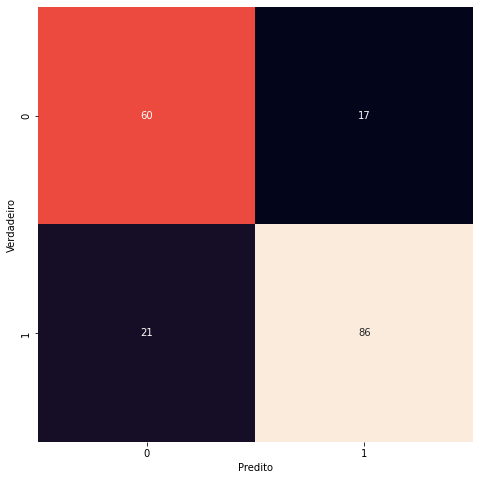

In [ ]:
nomes = np.unique(predicoes_svm)
plt.figure(figsize=(12,8))
sns.heatmap(matriz_svm , square=True, annot=True, fmt='d', cbar=False,
xticklabels=nomes, yticklabels=nomes)
plt.xlabel('Predito');
plt.ylabel('Verdadeiro');

In [ ]:
print(classification_report(y_teste,predicoes_svm))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76        77
           1       0.83      0.80      0.82       107

    accuracy                           0.79       184
   macro avg       0.79      0.79      0.79       184
weighted avg       0.80      0.79      0.79       184



#Tunning

In [ ]:
#Concatenando treino e teste
x_total = np.concatenate((X_treinamento_norm, X_teste_norm))
y_total = np.concatenate((y_treinamento, y_teste))

In [ ]:
from sklearn.model_selection import GridSearchCV #Importando GridSearch para tunning de hiperparâmetros

##Arvore de decisão

In [ ]:
#Criando dicionário para passar os parâmetros a serem testados
parametros = {
    'criterion': ['gini', 'entropy'],        #-> Com base no critério escolhido, o modelo definirá a importância de cada caractrística para a classificação.
    'splitter': ['best', 'random'],          #-> Relacionado com 'criterion', o modelo toma o recurso de maior importância ou aleatoriamente
    'min_samples_split': [2, 5, 10, 15],     #-> Define o número mínimo de amostras (ou observações) que são necessárias para considerar dividir um nó.
    'min_samples_leaf': [1, 5, 10, 15],      #-> Número mínimo de amostras em cada folha.
    'random_state': [10],                    #-> Aleatorierade do estimador, definindo um número inteiro, obtemos um comportamento determinístico. Também conhecido como "semente"
    'max_depth': [3, 5, 7, 9, 15, 20,]       #-> Profundidade máxima da folha
}

In [ ]:
#grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parametros)
#grid_search.fit(x_total, y_total)

In [ ]:
#melhores_h_parametros = grid_search.best_params_
#melhor_resultado = grid_search.best_score_

In [ ]:
#melhores_h_parametros

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'random_state': 10, 'splitter': 'random'}

In [ ]:
#melhor_resultado

0.8583452126395817

##KNN

In [ ]:
parametros = {
    'weights' : ['uniform', 'distance'],                          #-> Peso atribuido as distâncias. 'uniform' = Mesmo peso para todos os vizinhos | 'Distance' = peso maior para vizinhos próximos
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],      #-> Algoritmo usado para calcular os vizinhos mais próximos
    'n_neighbors': [1, 3, 5, 10, 20, 25, 30, 35],                 #-> Número de vizinhos a serem usados
    'p': [1, 2],                                                  #-> 1 para distância de Manhattan | 2 para distância Euclidiana
}

In [ ]:
#grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros)
#grid_search.fit(x_total, y_total)

In [ ]:
#melhores_h_parametros = grid_search.best_params_
#melhor_resultado = grid_search.best_score_

In [ ]:
#melhores_h_parametros

{'algorithm': 'auto', 1, 'n_neighbors': 25, 'p': 1, 'weights': 'uniform'}

In [ ]:
#melhor_resultado

 0.8605547636018057

##MLP
Tunning do MLP foi feito no Pycharm por conta da limitação do Colab

In [ ]:

parametros = {
    'hidden_layer_sizes': [(2,), (2, 2), (2, 2, 2), (11, 300, 300, 2)],     #-> Número de camadas e nós
    'solver': ['sgd', 'adam'],                                              #-> Algoritmo para otimização de peso nos nós.
    'batch_size': [10, 50, 100, 125, 150, 175, 200, 'auto'],                #-> Tamanho do lote: Define o número de amostras que serão propagadas pela rede
    'tol': [0.0001],                                                        #-> Tolerância para a otimização
    'max_iter': [15000],                                                    #-> Número de iterações
    'random_state': [10],                                                   #-> Aleatorierade do estimador, definindo um número inteiro, obtemos um comportamento determinístico. Também conhecido como "semente"
    'activation': ['identity', 'logistic', 'tanh', 'relu'],                 #-> Funções de ativação: dão ao modelo poder para ser mais flexível na descrição de relações arbitrárias.
    'learning_rate': ['constant', 'invscaling', 'adaptive']                 #-> Taxa de aprendizagem
}


In [ ]:
#grid_search = GridSearchCV(estimator=MLPClassifier(), param_grid=parametros)
#grid_search.fit(x_total, y_total)

In [ ]:
#melhores_h_parametros = grid_search.best_params_
#melhor_resultado = grid_search.best_score_

In [ ]:
#melhores_h_parametros

{'activation': 'relu', 'batch_size': 50, 'hidden_layer_sizes': (2, 2, 2), 'learning_rate': 'constant', 'max_iter': 15000, 'random_state': 10, 'solver': 'adam', 'tol': 0.0001}


In [ ]:
#melhor_resultado

0.8692682347350914

##Random Forest

In [ ]:
"""
parametros = {
'n_estimators': [100,1000],               #-> Número de estimadores
'min_samples_leaf': [1, 5, 10,14,20],     #-> Número mínimo de amostras em cada folha
'min_samples_split': [2, 5, 10, 14,20],   #-> Número mínimo de amostras exigido para separar um nó.
'max_features': ["auto", "sqrt", "log2"], #-> Número de atributos para analisar na separação. O default são todos.
'random_state': [10],                     
'bootstrap':[True, False]                 #-> 
}
"""

'\nparametros = {\n\'n_estimators\': [100,1000],               #-> Número de estimadores\n\'min_samples_leaf\': [1, 5, 10,14,20],     #-> Número mínimo de amostras em cada folha\n\'min_samples_split\': [2, 5, 10, 14,20],   #-> Número mínimo de amostras exigido para separar um nó.\n\'max_features\': ["auto", "sqrt", "log2"], #-> Número de atributos para analisar na separação. O default são todos.\n\'random_state\': [10],                     \n\'bootstrap\':[True, False]                 #-> \n}\n'

In [ ]:
#grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parametros)
#grid_search.fit(x_total, y_total)

In [ ]:
#melhores_h_parametros = grid_search.best_params_
#melhor_resultado = grid_search.best_score_

In [ ]:
#melhores_h_parametros

bootstrap': True, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 1000, 'random_state': 10

In [ ]:
#melhor_resultado

##XGboost

In [ ]:
"""
parametros_xg = {
'n_estimators': [100, 1000], #-> Número de estimadores
'learning_rate': [0.02, 0.035, 0.05, 0.07, 0.09, 0.1], #-> Taxa de aprendizagem
'max_depth': [1,3,5,7,9,15,20], #-> Comprimento da árvore vertical
'min_child_weight': [1, 5, 10,14,20], #-> Quantidade de amostras no último nó
'subsample': [0.3,0.5,0.7,0.9,1], #->  Fração das amostras a serem usadas na próxima rodada.
'random_state': [10]
}
"""

"\nparametros_xg = {\n'n_estimators': [100, 1000], #-> Número de estimadores\n'learning_rate': [0.02, 0.035, 0.05, 0.07, 0.09, 0.1], #-> Taxa de aprendizagem\n'max_depth': [1,3,5,7,9,15,20], #-> Comprimento da árvore vertical\n'min_child_weight': [1, 5, 10,14,20], #-> Quantidade de amostras no último nó\n'subsample': [0.3,0.5,0.7,0.9,1], #->  Fração das amostras a serem usadas na próxima rodada.\n'random_state': [10]\n}\n"

In [ ]:
#grid_search = GridSearchCV(estimator=XGBClassifier(), param_grid=parametros)
#grid_search.fit(x_total, y_total)

In [ ]:
#melhores_h_parametros = grid_search.best_params_
#melhor_resultado = grid_search.best_score_

In [ ]:
#melhores_h_parametros

{'learning_rate': 0.035,
 'max_depth': 5,
 'min_child_weight': 10,
 'n_estimators': 100,
 'random_state': 10,
 'subsample': 0.9}

In [ ]:
#melhor_resultado

0.7608695652173914

##SVM

In [ ]:
"""
param_grid_svm = {'C': [0.1,1, 10, 100], #-> Parâmetro de penalidade
                  'gamma': [1,0.1,0.01,0.001], #-> Coeficiente do Kernel
                  'kernel': ['rbf', 'poly', 'sigmoid'],
                  'random_state': [10]}
"""

"\nparam_grid_svm = {'C': [0.1,1, 10, 100], #-> Parâmetro de penalidade\n                  'gamma': [1,0.1,0.01,0.001], #-> Coeficiente do Kernel\n                  'kernel': ['rbf', 'poly', 'sigmoid'],\n                  'random_state': [10]}\n"

In [ ]:
#grid_search = GridSearchCV(estimator=SVC(), param_grid = param_grid_svm)
#grid_final = grid_search.fit(X_treinamento_norm, y_treinamento)

In [ ]:
#melhores_h_parametros

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf', 'random_state': 10}

In [ ]:
#melhor_resultado

0.8637871586990962

##Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

DT

In [ ]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=1,
                            min_samples_split=10, random_state=10, splitter='random')

KNN

In [ ]:
knn = KNeighborsClassifier(algorithm='auto', n_neighbors=25, p=1, weights= 'uniform')

MLP

In [ ]:
#mlp = MLPClassifier(activation='relu', batch_size=50, 
 #                   hidden_layer_sizes=(2, 2, 2), 
  #                  learning_rate='constant', max_iter=15000, 
   #                 random_state=10, solver='adam', tol=0.0001)

RF



In [ ]:
rf = RandomForestClassifier(bootstrap='True', max_features= 'auto', 
                            min_samples_leaf=5, min_samples_split=2, 
                            n_estimators=1000, random_state=10)

SVM

In [ ]:
svm = SVC(C=1, gamma=0.01, kernel='rbf', random_state=10)

XG

In [ ]:
#xg = XGBClassifier(learning_rate=0.035, max_depth=5, min_child_weight=10, n_estimators=100, random_state=10, subsample=0.9)

In [ ]:
nb = metodo_CNB

Fazendo 10-fold CV

In [ ]:
resultados_DT = []
resultados_RF = []
resultados_KNN = []
resultados_SVM = []
resultados_NB = []
#resultados_MLP = []
#resultados_XG = []

In [ ]:
for i in range(30):
  particoes = KFold(n_splits=10, shuffle=True, random_state=i)

  scores = cross_val_score(nb, X_treinamento, y_treinamento, cv = particoes)
  resultados_NB.append(scores.mean())

  scores = cross_val_score(dt, x_total, y_total, cv = particoes)
  resultados_DT.append(scores.mean())

  scores = cross_val_score(knn, x_total, y_total, cv = particoes)
  resultados_KNN.append(scores.mean())

  #scores = cross_val_score(mlp, x_total, y_total, cv = particoes)
  #resultados_MLP.append(scores.mean())
  
  scores = cross_val_score(rf, x_total, y_total, cv = particoes)
  resultados_RF.append(scores.mean())
  
  scores = cross_val_score(svm, x_total, y_total, cv = particoes)
  resultados_SVM.append(scores.mean())

  #scores = cross_val_score(xg, x_total, y_total, cv = particoes)
  #resultados_XG.append(scores.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 105, in __call__
    score = scorer(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py", line 83, in predict
    jll = self._joint_log_likelihood(X)
  File "/usr/local

In [ ]:
resultadosf1_DT = []
resultadosf1_RF = []
resultadosf1_KNN = []
resultadosf1_SVM = []
resultadosf1_NB = []
#resultadosf1_MLP = []
#resultadosf1_XG = []

In [ ]:
#Caso necessario
#resultadosf1_DT.clear()
#resultadosf1_RF.clear()
#resultadosf1_KNN.clear()
#resultadosf1_SVM.clear()
#resultadosf1_NB.clear()
#resultadosf1_MLP.clear()
#resultadosf1_XG.clear()


In [ ]:
for i in range(30):
  particoesf1 = KFold(n_splits=10, shuffle=True, random_state=i)

  scores = cross_val_score(nb, X_treinamento, y_treinamento, cv = particoesf1, scoring = 'f1')
  resultadosf1_NB.append(scores.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py", line 83, in predict
    jll = self._joint_log_likelihood(X)
  File

In [ ]:
for i in range(30):
  particoesf1 = KFold(n_splits=10, shuffle=True, random_state=i)

  scores = cross_val_score(dt, x_total, y_total, cv = particoesf1, scoring = 'f1')
  resultadosf1_DT.append(scores.mean())

In [ ]:
for i in range(30):
  particoesf1 = KFold(n_splits=10, shuffle=True, random_state=i)

  scores = cross_val_score(knn, x_total, y_total, cv = particoesf1, scoring = 'f1')
  resultadosf1_KNN.append(scores.mean())

In [ ]:
#for i in range(30):
 # particoesf1 = KFold(n_splits=10, shuffle=True, random_state=i)
#
 # scores = cross_val_score(mlp, x_total, y_total, cv = particoesf1, scoring = 'f1')
  #resultadosf1_MLP.append(scores.mean())

In [ ]:
for i in range(30):
  particoesf1 = KFold(n_splits=10, shuffle=True, random_state=i)

  scores = cross_val_score(rf, x_total, y_total, cv = particoesf1, scoring = 'f1')
  resultadosf1_RF.append(scores.mean())

In [ ]:
for i in range(30):
  particoesf1 = KFold(n_splits=10, shuffle=True, random_state=i)

  scores = cross_val_score(svm, x_total, y_total, cv = particoesf1, scoring = 'f1')
  resultadosf1_SVM.append(scores.mean())

In [ ]:
#for i in range(30):
 # particoesf1 = KFold(n_splits=10, shuffle=True, random_state=i)
 #
  #scores = cross_val_score(xg, x_total, y_total, cv = particoesf1, scoring = 'f1')
  #resultadosf1_XG.append(scores.mean())


In [ ]:
resultados_NB

[0.8582932247315809,
 0.8651795631247685,
 0.8596815994076268,
 0.8623287671232877,
 0.8609033691225472,
 0.8651425398000742,
 0.8609959274342837,
 0.8609774157719363,
 0.8609774157719363,
 0.862550907071455,
 0.8596630877452794,
 0.8569603850425767,
 0.8611810440577564,
 0.8625138837467604,
 nan,
 0.8610699740836726,
 0.8637356534616808,
 0.8596075527582379,
 0.8638652350981119,
 0.8625694187338023,
 0.8596075527582376,
 0.8569233617178822,
 0.8595705294335432,
 0.8556090336912254,
 0.8596445760829322,
 0.8650870048130322,
 0.8622732321362457,
 0.8624953720844131,
 0.8597926693817104,
 0.8623843021103295]

In [ ]:
resultadosf1_NB

[0.869050383441411,
 0.8753144070833008,
 0.8717422580396044,
 0.873890739403625,
 0.8654307475269721,
 0.8735801462158352,
 0.8720605479284622,
 0.87109630130211,
 0.8710883612798799,
 0.8728115714147615,
 0.8672549684782469,
 0.8669565210234603,
 0.8717972407511159,
 0.8712018015979701,
 nan,
 0.8711309416312846,
 0.8744041485293466,
 0.8716922303833453,
 0.8722371889268284,
 0.8741799682004803,
 0.8691175492413867,
 0.8695272027311691,
 0.8705269711488516,
 0.8645177153268065,
 0.8718257470136702,
 0.8762020024280037,
 0.8748584067531873,
 0.8724795352608347,
 0.8678075297129053,
 0.8725779314470721]

In [ ]:
resultados_DT

[0.8562947921643573,
 0.840934065934066,
 0.8486144290492117,
 0.8474558050645007,
 0.8562350692785475,
 0.8496894409937887,
 0.8474916387959865,
 0.8561514572384137,
 0.8561992355470617,
 0.85072861920688,
 0.8539536550406115,
 0.8550883898709987,
 0.8475394171046344,
 0.8551003344481607,
 0.8365384615384615,
 0.8497252747252748,
 0.8398590539894887,
 0.8529741997133302,
 0.8605948399426661,
 0.850764452938366,
 0.8442188246536071,
 0.8387720974677496,
 0.8550645007166746,
 0.8551361681796464,
 0.8409698996655518,
 0.8410176779741997,
 0.843167701863354,
 0.8541208791208792,
 0.8508241758241759,
 0.8595556617295749]

In [ ]:
resultadosf1_DT

[0.8735270594432867,
 0.8581162550569325,
 0.8675224985141158,
 0.8634797634242354,
 0.8715342161370311,
 0.868158617145102,
 0.8645665990011455,
 0.8711180400346563,
 0.8725770676670888,
 0.8682830662268224,
 0.8700533600643944,
 0.8735789975879715,
 0.8644081290900733,
 0.8715791355365115,
 0.8545889259513991,
 0.8648014189016265,
 0.8598595890747267,
 0.8717046977894688,
 0.8768775920316008,
 0.8679339827336582,
 0.8617491226535003,
 0.8540827057036949,
 0.8739968912001492,
 0.8724070758555772,
 0.8540657840263147,
 0.8576289800080958,
 0.8640434336570332,
 0.868735468531594,
 0.8668575462327585,
 0.875458801194165]

In [ ]:
resultados_KNN

[0.8606426182513138,
 0.8572623029144768,
 0.8649904443382704,
 0.8615623506927854,
 0.8606067845198281,
 0.8627209746774962,
 0.8605470616340181,
 0.8616579073100812,
 0.8626851409460106,
 0.860582895365504,
 0.8637840420449117,
 0.8627329192546584,
 0.8605948399426658,
 0.8606067845198281,
 0.8594839942666029,
 0.8649665551839464,
 0.8606187290969901,
 0.8605948399426661,
 0.8605948399426658,
 0.8649187768752986,
 0.8572742474916388,
 0.8583612040133779,
 0.857226469182991,
 0.8616698518872431,
 0.8616340181557574,
 0.8562470138557096,
 0.8594720496894409,
 0.8628404204491161,
 0.8682274247491639,
 0.8616817964644051]

In [ ]:
resultadosf1_KNN

[0.8773909338220394,
 0.8722370364028409,
 0.8801993417125693,
 0.8738159703749687,
 0.8744104934040449,
 0.8781874860502962,
 0.8752654417357058,
 0.8760839630113306,
 0.8782551564671298,
 0.875177763966942,
 0.8787280465268493,
 0.8781476862476391,
 0.8750689933417665,
 0.8762281583053853,
 0.8755719720116826,
 0.876714544636134,
 0.8761687676804708,
 0.8771448499613544,
 0.8741268447848174,
 0.8804711081176755,
 0.8717093735509153,
 0.8726496785833231,
 0.8759128484582771,
 0.8775653177481711,
 0.8757597897208729,
 0.8698705598834356,
 0.8752564795316287,
 0.8764062186450923,
 0.882299257492388,
 0.8760267121341926]

In [ ]:
resultados =pd.DataFrame({'DT':(resultados_DT), 'RF':(resultados_RF), 'KNN':(resultados_KNN),
'SVM':(resultados_SVM), 'NB':(resultados_NB)})  #,'MLP':(resultados_MLP), 'XG':(resultados_XG)

In [ ]:
resultados

,DT,RF,KNN,SVM,NB
0,0.856295,0.857334,0.860643,0.857358,0.858293
1,0.840934,0.866042,0.857262,0.855112,0.865180
2,0.848614,0.861706,0.864990,0.858421,0.859682
3,0.847456,0.863760,0.861562,0.856128,0.862329
4,0.856235,0.864943,0.860607,0.857310,0.860903
5,0.849689,0.860559,0.862721,0.857298,0.865143
6,0.847492,0.863796,0.860547,0.859460,0.860996
7,0.856151,0.862709,0.861658,0.859472,0.860977
8,0.856199,0.861622,0.862685,0.856187,0.860977
9,0.850729,0.859508,0.860583,0.856247,0.862551


In [ ]:
resultados.describe()

,DT,RF,KNN,SVM,NB
count,30.000000,30.000000,30.000000,30.000000,29.000000
mean,0.849826,0.861125,0.861226,0.858070,0.861089
std,0.006592,0.003014,0.002609,0.002369,0.002417
min,0.836538,0.855184,0.856247,0.854013,0.855609
25%,0.845028,0.859475,0.860556,0.856211,0.859645
50%,0.850747,0.861634,0.860631,0.857370,0.860996
75%,0.855097,0.863497,0.862712,0.859481,0.862514
max,0.860595,0.866042,0.868227,0.863880,0.865180


In [ ]:
#Coeficiente de Variação - CV / Mede a homogeniedade ou heterogeniedade do resultado dos testes
#For menor ou igual a 15% → baixa dispersão: dados homogêneos
#For entre 15 e 30% → média dispersão
#For maior que 30% → alta dispersão: dados heterogêneos

(resultados.std() / resultados.mean()) * 100

DT     0.775682
RF     0.350032
KNN    0.302981
SVM    0.276037
NB     0.280724
dtype: float64

In [ ]:
from scipy.stats import shapiro

In [ ]:
F1 = pd.DataFrame({'DT':(resultadosf1_DT), 'RF':(resultadosf1_RF), 'KNN':(resultadosf1_KNN),
'SVM':(resultadosf1_SVM), 'NB':(resultadosf1_NB)}) #""", 'MLP':(resultadosf1_MLP), 'XG':(resultadosf1_XG)"""

In [ ]:
F1

,DT,RF,KNN,SVM,NB
0,0.873527,0.875974,0.877391,0.874367,0.869050
1,0.858116,0.881537,0.872237,0.871973,0.875314
2,0.867522,0.878394,0.880199,0.874934,0.871742
3,0.863480,0.877990,0.873816,0.870012,0.873891
4,0.871534,0.879663,0.874410,0.872372,0.865431
5,0.868159,0.878249,0.878187,0.875286,0.873580
6,0.864567,0.878603,0.875265,0.874649,0.872061
7,0.871118,0.879463,0.876084,0.875900,0.871096
8,0.872577,0.877830,0.878255,0.872612,0.871088
9,0.868283,0.876156,0.875178,0.873335,0.872812


In [ ]:
F1.describe()

,DT,RF,KNN,SVM,NB
count,30.000000,30.000000,30.000000,30.000000,29.000000
mean,0.866776,0.877438,0.876095,0.873959,0.871254
std,0.006518,0.002965,0.002629,0.002415,0.002877
min,0.854066,0.871650,0.869871,0.869329,0.864518
25%,0.863621,0.875967,0.875096,0.872432,0.869527
50%,0.868046,0.877612,0.876055,0.873936,0.871742
75%,0.871673,0.879460,0.877522,0.875316,0.872812
max,0.876878,0.882565,0.882299,0.879908,0.876202


In [ ]:
#Coeficiente de Variação - CV para F1
(F1.std() / F1.mean()) * 100

DT     0.751967
RF     0.337925
KNN    0.300108
SVM    0.276322
NB     0.330233
dtype: float64

##Teste de Shapiro

Teste de normalidade. Se a hipotese for nula é porque a distribuição é normal. Se o p-value for pequeno eu rejeito a hipótese nula e não é normal, se o p-value for alto (p-value > nível de significância) eu não rejeito a hipótese nula. Utilizaremos nível de significância 0.05.

In [ ]:
shapiro(resultados_DT), shapiro(resultados_RF), shapiro(resultados_KNN), shapiro(resultados_SVM), shapiro(resultados_NB), #shapiro(resultados_MLP), shapiro(resultados_XG),

(ShapiroResult(statistic=0.9425415992736816, pvalue=0.10649658739566803),
 ShapiroResult(statistic=0.9637083411216736, pvalue=0.3838750720024109),
 ShapiroResult(statistic=0.95412278175354, pvalue=0.2177101969718933),
 ShapiroResult(statistic=0.9680923223495483, pvalue=0.48838546872138977),
 ShapiroResult(statistic=nan, pvalue=1.0))

In [ ]:
shapiro(resultadosf1_DT), shapiro(resultadosf1_RF), shapiro(resultadosf1_KNN), shapiro(resultadosf1_SVM), shapiro(resultadosf1_NB), #shapiro(resultadosf1_MLP), shapiro(resultadosf1_XG),

(ShapiroResult(statistic=0.9391539096832275, pvalue=0.08631067723035812),
 ShapiroResult(statistic=0.970704197883606, pvalue=0.5586204528808594),
 ShapiroResult(statistic=0.9823533296585083, pvalue=0.8840717673301697),
 ShapiroResult(statistic=0.98207026720047, pvalue=0.877520740032196),
 ShapiroResult(statistic=nan, pvalue=1.0))

In [ ]:
sns.displot(resultados_DT, kind = 'kde')

In [ ]:
sns.displot(resultadosf1_DT, kind = 'kde')

In [ ]:
sns.displot(resultados_KNN, kind = 'kde')

In [ ]:
sns.displot(resultadosf1_KNN, kind = 'kde')

In [ ]:
#sns.displot(resultados_MLP, kind = 'kde')

In [ ]:
#sns.displot(resultadosf1_MLP, kind = 'kde')

In [ ]:
sns.displot(resultados_NB, kind = 'kde')

In [ ]:
sns.displot(resultadosf1_NB, kind = 'kde')

In [ ]:
sns.displot(resultados_RF, kind = 'kde')

In [ ]:
sns.displot(resultados_RF, kind = 'kde')

In [ ]:
sns.displot(resultados_SVM, kind = 'kde')

In [ ]:
sns.displot(resultados_SVM, kind = 'kde')

In [ ]:
#sns.displot(resultados_XG, kind = 'kde')

In [ ]:
sns.displot(resultadosf1_SVM, kind = 'kde')

In [ ]:
resultados_algoritmos = {'accuracy': np.concatenate([resultados_DT, resultados_RF, resultados_KNN, resultados_SVM, resultados_NB]),
'algoritmo': ['DT', 'DT', 'DT', 'DT', 'DT',\
'DT', 'DT', 'DT', 'DT', 'DT',\
'DT', 'DT', 'DT', 'DT', 'DT',\
'DT', 'DT', 'DT', 'DT', 'DT',\
'DT', 'DT', 'DT', 'DT', 'DT',\
'DT', 'DT', 'DT', 'DT', 'DT',\
'RF', 'RF', 'RF', 'RF', 'RF',\
'RF', 'RF', 'RF', 'RF', 'RF',\
'RF', 'RF', 'RF', 'RF', 'RF',\
'RF', 'RF', 'RF', 'RF', 'RF',\
'RF', 'RF', 'RF', 'RF', 'RF',\
'RF', 'RF', 'RF', 'RF', 'RF',\
'KNN', 'KNN', 'KNN', 'KNN', 'KNN',\
'KNN', 'KNN', 'KNN', 'KNN', 'KNN',\
'KNN', 'KNN', 'KNN', 'KNN', 'KNN',\
'KNN', 'KNN', 'KNN', 'KNN', 'KNN',\
'KNN', 'KNN', 'KNN', 'KNN', 'KNN',\
'KNN', 'KNN', 'KNN', 'KNN', 'KNN',\
'SVM', 'SVM', 'SVM', 'SVM', 'SVM',\
'SVM', 'SVM', 'SVM', 'SVM', 'SVM',\
'SVM', 'SVM', 'SVM', 'SVM', 'SVM',\
'SVM', 'SVM', 'SVM', 'SVM', 'SVM',\
'SVM', 'SVM', 'SVM', 'SVM', 'SVM',\
'SVM', 'SVM', 'SVM', 'SVM', 'SVM',\
'NB', 'NB', 'NB', 'NB', 'NB',\
'NB', 'NB', 'NB', 'NB', 'NB',\
'NB', 'NB', 'NB', 'NB', 'NB',\
'NB', 'NB', 'NB', 'NB', 'NB',\
'NB', 'NB', 'NB', 'NB', 'NB',\
'NB', 'NB', 'NB', 'NB', 'NB',]}
#'MLP', 'MLP', 'MLP', 'MLP', 'MLP',\
#'MLP', 'MLP', 'MLP', 'MLP', 'MLP',\
#'MLP', 'MLP', 'MLP', 'MLP', 'MLP',\
#'MLP', 'MLP', 'MLP', 'MLP', 'MLP',\
#'MLP', 'MLP', 'MLP', 'MLP', 'MLP',\
#'MLP', 'MLP', 'MLP', 'MLP', 'MLP',\
#'XG', 'XG', 'XG', 'XG', 'XG',\
#'XG', 'XG', 'XG', 'XG', 'XG',\
#'XG', 'XG', 'XG', 'XG', 'XG',\
#'XG', 'XG', 'XG', 'XG', 'XG',\
#'XG', 'XG', 'XG', 'XG', 'XG',\
#'XG', 'XG', 'XG', 'XG', 'XG']}

In [ ]:
resultados_df = pd.DataFrame(resultados_algoritmos)
resultados_df.head(150)

,accuracy,algoritmo
0,0.856295,DT
1,0.840934,DT
2,0.848614,DT
3,0.847456,DT
4,0.856235,DT
...,...,...
145,0.865087,NB
146,0.862273,NB
147,0.862495,NB
148,0.859793,NB


In [ ]:
resultados_algoritmosf1 = {'f1': np.concatenate([resultadosf1_DT, resultadosf1_RF, resultadosf1_KNN, resultadosf1_SVM, resultadosf1_NB])
'algoritmo': ['DT', 'DT', 'DT', 'DT', 'DT',\
'DT', 'DT', 'DT', 'DT', 'DT',\
'DT', 'DT', 'DT', 'DT', 'DT',\
'DT', 'DT', 'DT', 'DT', 'DT',\
'DT', 'DT', 'DT', 'DT', 'DT',\
'DT', 'DT', 'DT', 'DT', 'DT',\
'RF', 'RF', 'RF', 'RF', 'RF',\
'RF', 'RF', 'RF', 'RF', 'RF',\
'RF', 'RF', 'RF', 'RF', 'RF',\
'RF', 'RF', 'RF', 'RF', 'RF',\
'RF', 'RF', 'RF', 'RF', 'RF',\
'RF', 'RF', 'RF', 'RF', 'RF',\
'KNN', 'KNN', 'KNN', 'KNN', 'KNN',\
'KNN', 'KNN', 'KNN', 'KNN', 'KNN',\
'KNN', 'KNN', 'KNN', 'KNN', 'KNN',\
'KNN', 'KNN', 'KNN', 'KNN', 'KNN',\
'KNN', 'KNN', 'KNN', 'KNN', 'KNN',\
'KNN', 'KNN', 'KNN', 'KNN', 'KNN',\
'SVM', 'SVM', 'SVM', 'SVM', 'SVM',\
'SVM', 'SVM', 'SVM', 'SVM', 'SVM',\
'SVM', 'SVM', 'SVM', 'SVM', 'SVM',\
'SVM', 'SVM', 'SVM', 'SVM', 'SVM',\
'SVM', 'SVM', 'SVM', 'SVM', 'SVM',\
'SVM', 'SVM', 'SVM', 'SVM', 'SVM',\
'NB', 'NB', 'NB', 'NB', 'NB',\
'NB', 'NB', 'NB', 'NB', 'NB',\
'NB', 'NB', 'NB', 'NB', 'NB',\
'NB', 'NB', 'NB', 'NB', 'NB',\
'NB', 'NB', 'NB', 'NB', 'NB',\
'NB', 'NB', 'NB', 'NB', 'NB',\]}
#'MLP', 'MLP', 'MLP', 'MLP', 'MLP',\
#'MLP', 'MLP', 'MLP', 'MLP', 'MLP',\
#'MLP', 'MLP', 'MLP', 'MLP', 'MLP',\
#'MLP', 'MLP', 'MLP', 'MLP', 'MLP',\
#'MLP', 'MLP', 'MLP', 'MLP', 'MLP',\
#'MLP', 'MLP', 'MLP', 'MLP', 'MLP',\
#'XG', 'XG', 'XG', 'XG', 'XG',\
#'XG', 'XG', 'XG', 'XG', 'XG',\
#'XG', 'XG', 'XG', 'XG', 'XG',\
#'XG', 'XG', 'XG', 'XG', 'XG',\
#'XG', 'XG', 'XG', 'XG', 'XG',\
#'XG', 'XG', 'XG', 'XG', 'XG']}

SyntaxError: ignored

In [ ]:
resultados_dff1 = pd.DataFrame(resultados_algoritmosf1)
resultados_dff1.head(200)

##Teste de Tukey

In [ ]:
from statsmodels.stats.multicomp import MultiComparison

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
compara_algoritmos = MultiComparison(resultados_df['accuracy'], resultados_df['algoritmo'])

In [ ]:
teste_estatistico = compara_algoritmos.tukeyhsd()
teste_estatistico


NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.


TypeError: ignored